# Assignment - 06
#### Read weather data from 
https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [101]:
# import necessary libraries
import pandas as pd
import seaborn as sns

In [102]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, index_col='date')
df.columns.to_list()

/tmp/ipykernel_30616/4028010592.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, index_col='date')


['ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

In [103]:
# Drop unwandted columns
df = df.drop(columns=['ind', 'rain', 'ind.1', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']
)

In [104]:
# convert blank data to 0
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [105]:
# convert date time to date
df['DATE']=pd.to_datetime(df.index).date
# convert the date time to month
df['MONTH']=pd.to_datetime(df.index).year.astype(dtype='str') +"-"+ pd.to_datetime(df.index).month.astype(dtype='str')

print(df.head(3))

/tmp/ipykernel_30616/3836887481.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE']=pd.to_datetime(df.index).date
/tmp/ipykernel_30616/3836887481.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MONTH']=pd.to_datetime(df.index).year.astype(dtype='str') +"-"+ pd.to_datetime(df.index).month.astype(dtype='str')
/tmp/ipykernel_30616/3836887481.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MONTH']=pd.to_datetime(df.index).year.astype(dtype='str') +"-"+ pd.to_datetime(df.index).month.astype(dtype='str')


                   temp  wdsp        DATE   MONTH
date                                             
10-apr-1996 14:00  11.5   0.0  1996-04-10  1996-4
31-jul-1996 08:00  11.5   0.0  1996-07-31  1996-7
31-jul-1996 09:00  11.6   0.0  1996-07-31  1996-7


In [106]:
# Plot the hourly temperature data
#sns.lineplot(data=df, x="date", y='temp').set_title('Hourly Temperature Data')

In [107]:
daily_avg_temp = df.groupby('DATE')['temp'].mean()
print(daily_avg_temp.head(3))

DATE
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
Name: temp, dtype: float64


Text(0.5, 1.0, 'Daily Average Temperature')

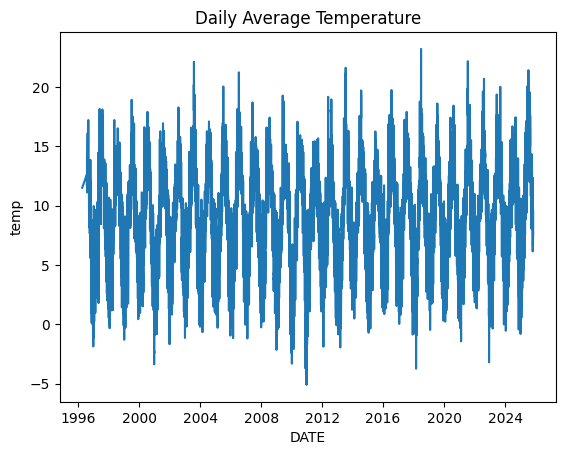

In [108]:
# plot the daily average temperature
sns.lineplot(data=daily_avg_temp).set_title('Daily Average Temperature')

In [109]:
monthly_avg_temp = df.groupby('MONTH')['temp'].mean()
print(monthly_avg_temp)

MONTH
1996-10     9.614113
1996-11     4.909444
1996-12     3.209946
1996-4     11.500000
1996-7     12.650000
             ...    
2025-5     12.409274
2025-6     13.433889
2025-7     15.068280
2025-8     15.178495
2025-9     11.368056
Name: temp, Length: 354, dtype: float64


Text(0.5, 1.0, 'Monthly Average Temperature')

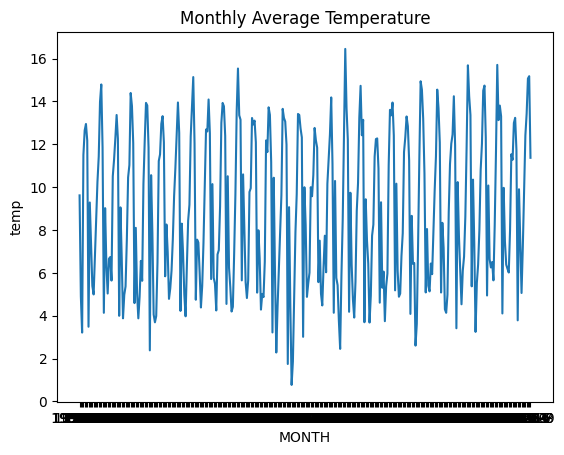

In [110]:
# plot the daily average temperature
sns.lineplot(data=monthly_avg_temp).set_title('Monthly Average Temperature')

In [111]:
rolling_wind_speed = df['wdsp'].rolling(window=24).mean()
print(rolling_wind_speed)

date
10-apr-1996 14:00          NaN
31-jul-1996 08:00          NaN
31-jul-1996 09:00          NaN
31-jul-1996 10:00          NaN
31-jul-1996 11:00          NaN
                       ...    
31-oct-2025 20:00    17.166667
31-oct-2025 21:00    16.958333
31-oct-2025 22:00    16.625000
31-oct-2025 23:00    16.166667
01-nov-2025 00:00    15.625000
Name: wdsp, Length: 256434, dtype: float64


In [112]:
# Get Maximum windspeed of the day
day_max_windspeed = df.groupby('DATE')['wdsp'].max()
print(day_max_windspeed.head(3))

DATE
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
Name: wdsp, dtype: float64


In [ ]:
# add column in daily_avg_temp for month


daily_avg_temp['MONTH'] = pd.to_datetime(day_max_windspeed.index).year.astype(dtype='str') +"-"+ pd.to_datetime(day_max_windspeed.index).month.astype(dtype='str')
print(daily_avg_temp['MONTH'].head(3))

AttributeError: 'Index' object has no attribute 'head'

In [122]:
#  get monthly mean of the daily max windspeeds
# get the month and year from the date index
monthly_max_windspeed = day_max_windspeed.groupby('MONTH')['wdsp'].mean()
print(monthly_max_windspeed)

KeyError: 'MONTH'

# End